## Combining all data sets, adding missing value by ML

As we have many data sets with different periods and frequencies we add data to the datasets with less data by using ML methods.

First we will look for the dataset that have most data in period.

In [164]:
# import og nesecery libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#from pandas_datareader import data as pdr

## Reading SP500 and cleaning the data

In [8]:
# ---- YOUSSEF ---- reading data from CSV
#df_sp500 = pd.read_csv('/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv')

# ---- LASSE -----
dir = '/Users/lassekh/Documents/Datamatiker/4-semester/BI - Business Intelligence/bi-exam-project-stock/datasets/not in use/sp500/'
csv_files = [f'{dir}part_{i}.csv' for i in range(1, 26)]

# load all csv-files into a data frame
dfs = [pd.read_csv(file) for file in csv_files]

# combine all DFs in one
df_sp500 = pd.concat(dfs, ignore_index=True)

In [11]:
# Converting Date column to DateTime format
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])

df_sp500['Ticker'].value_counts()

Ticker
MMM     15782
CVX     15782
BA      15782
MRK     15782
MRO     15782
        ...  
KVUE      342
VLTO      237
GEV       115
SOLV      115
SW         48
Name: count, Length: 501, dtype: int64

In [12]:


# dropping unnecesery columns
df_sp500 = df_sp500.drop(columns=['Ticker', 'Volume', 'Adj Close', 'High','Low', 'Open'])

df_sp500.rename(columns={'Close':'Close SP500'}, inplace=True)

In [13]:
df_sp500

,Date,Close SP500
0,1962-01-02,3.475125
1,1962-01-03,3.501254
2,1962-01-04,3.501254
3,1962-01-05,3.409804
4,1962-01-08,3.390207
...,...,...
4239718,2024-09-06,189.229996
4239719,2024-09-09,191.729996
4239720,2024-09-10,191.360001
4239721,2024-09-11,189.990005


Group all data by the date, so we can get one value for the entire S&P500 index. We will try with both the sum and the mean of the stocks in the dataset.

In [14]:
# Group by Date and calculate the sum for each column
df_sp500_sum_of_ticker = df_sp500.groupby('Date').agg({
    'Close SP500': 'sum',
}).reset_index()

# Group by Date and calculate the mean for each column
df_sp500_mean_of_ticker = df_sp500.groupby('Date').agg({
    'Close SP500': 'mean',
}).reset_index()


In [72]:
df_sp500_sum_of_ticker.tail(10)

,Date,Close SP500
15772,2024-08-29,109413.742295
15773,2024-08-30,110300.809630
15774,2024-09-03,108383.569786
15775,2024-09-04,108515.715411
15776,2024-09-05,107688.239623
15777,2024-09-06,106514.315233
15778,2024-09-09,107778.020273
15779,2024-09-10,108022.424933
15780,2024-09-11,108357.217675
15781,2024-09-12,109011.579898


In [80]:
df_gold = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/datasets/cleaned_gold_data.csv')

,Date,Price,Open,High,Low,Change %
0,2024-09-26,2675.57,2656.52,2685.61,2655.14,0.71
1,2024-09-25,2656.82,2655.90,2670.60,2649.84,0.00
2,2024-09-24,2656.70,2628.92,2664.47,2622.58,1.08
3,2024-09-23,2628.40,2621.81,2635.54,2613.60,0.25
4,2024-09-20,2621.96,2587.50,2625.79,2584.81,1.37
...,...,...,...,...,...,...
11599,1980-01-03,634.25,634.25,634.25,634.25,13.31
11600,1980-01-02,559.75,559.75,559.75,559.75,9.33
11601,1980-01-01,512.00,512.00,512.00,512.00,0.00
11602,1979-12-28,512.00,512.00,512.00,512.00,-0.68


In [81]:
df_gold['Date'] = pd.to_datetime(df_gold['Date'])

df_gold = df_gold.drop(columns=(['Open', 'High', 'Low', 'Change %']))

df_gold.rename(columns={'Price':'Close Gold'}, inplace=True)

In [82]:
df_gold = df_gold.sort_values(by='Date')
df_gold

,Date,Close Gold
11603,1979-12-27,515.50
11602,1979-12-28,512.00
11601,1980-01-01,512.00
11600,1980-01-02,559.75
11599,1980-01-03,634.25
...,...,...
4,2024-09-20,2621.96
3,2024-09-23,2628.40
2,2024-09-24,2656.70
1,2024-09-25,2656.82


## Reading Inflation and interest and cleaning the data

In [25]:
df_interest_inflation = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/main/datasets/fed_interest_rate_inflation.csv')
# /Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/interest_rate_2017_now_cleaned.xlsx
df_interest_2017_to_now = pd.read_excel('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/main/datasets/interest_rate_2017_now_cleaned.xlsx')

In [26]:
df_interest_inflation

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3
901,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2
902,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN


In [27]:
df_interest_2017_to_now

,Effective Date,Rate (%)
0,09/16/2024,5.33
1,09/13/2024,5.33
2,09/12/2024,5.33
3,09/11/2024,5.33
4,09/10/2024,5.33
...,...,...
1932,01/09/2017,0.66
1933,01/06/2017,0.66
1934,01/05/2017,0.66
1935,01/04/2017,0.66


We now choose to drop columns because the dataset contains lots of different values for upper rate target, lower rate target etc. but we just need one rate.

In [28]:
# drop all columns we don't need
df_interest_inflation_dropped = df_interest_inflation.drop(columns=['Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target', 'Real GDP (Percent Change)', 'Unemployment Rate'])

# Combine the columns Year, Month, Day into one DateTime column
df_interest_inflation_dropped['Date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])

# Insert the new column at the beginning
df_interest_inflation_dropped.insert(0, 'Date', df_interest_inflation_dropped.pop('Date'))

# Drop Year, Month and Day
df_interest_inflation_dropped = df_interest_inflation_dropped.drop(columns=['Year', 'Month', 'Day'])

In [29]:
df_interest_inflation_dropped.ffill(inplace=True)
df_interest_inflation_dropped.bfill(inplace=True)

df_interest_inflation_dropped.info()
df_interest_inflation_dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          904 non-null    datetime64[ns]
 1   Effective Federal Funds Rate  904 non-null    float64       
 2   Inflation Rate                904 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 21.3 KB


,Date,Effective Federal Funds Rate,Inflation Rate
0,1954-07-01,0.80,3.2
1,1954-08-01,1.22,3.2
2,1954-09-01,1.06,3.2
3,1954-10-01,0.85,3.2
4,1954-11-01,0.83,3.2
...,...,...,...
899,2016-12-14,0.54,2.2
900,2017-01-01,0.65,2.3
901,2017-02-01,0.66,2.2
902,2017-03-01,0.66,2.2


In [30]:
df_interest_inflation_dropped.rename(columns={'Effective Federal Funds Rate':'Interest Rate'}, inplace=True)

df_interest_inflation_dropped

,Date,Interest Rate,Inflation Rate
0,1954-07-01,0.80,3.2
1,1954-08-01,1.22,3.2
2,1954-09-01,1.06,3.2
3,1954-10-01,0.85,3.2
4,1954-11-01,0.83,3.2
...,...,...,...
899,2016-12-14,0.54,2.2
900,2017-01-01,0.65,2.3
901,2017-02-01,0.66,2.2
902,2017-03-01,0.66,2.2


In [31]:
# removing all columns unless date and 
df_interest_2017_to_now1 = df_interest_2017_to_now.filter(items=['Effective Date', 'Rate (%)'])

# Convert the current column with date to a column with datetime data type and drop the 'Effective Date'
df_interest_2017_to_now1['Date'] = pd.to_datetime(df_interest_2017_to_now1['Effective Date'])
df_interest_2017_to_now1 = df_interest_2017_to_now1.drop(columns=['Effective Date'])

In [32]:
df_interest_2017_to_now1.rename(columns={'Rate (%)':'Interest Rate'}, inplace=True)

df_interest_2017_to_now1

,Interest Rate,Date
0,5.33,2024-09-16
1,5.33,2024-09-13
2,5.33,2024-09-12
3,5.33,2024-09-11
4,5.33,2024-09-10
...,...,...
1932,0.66,2017-01-09
1933,0.66,2017-01-06
1934,0.66,2017-01-05
1935,0.66,2017-01-04


Now i will combine the to interest dataframes. as one of them goes to 2017 and the other one goes fram 2017 till 2024

In [33]:
# combining the dataframes with 'Interest Rate'
df_interest_combined = pd.concat([df_interest_inflation_dropped, df_interest_2017_to_now1])

# Sorting after 'Date'
df_interest_combined = df_interest_combined.sort_values(by='Date').reset_index(drop=True)

# Removing duplicates of dates if overlaping
df_interest_combined = df_interest_combined.drop_duplicates(subset='Date')



In [34]:
df_interest_combined.tail(30)

,Date,Interest Rate,Inflation Rate
2811,2024-08-05,5.33,NaN
2812,2024-08-06,5.33,NaN
2813,2024-08-07,5.33,NaN
2814,2024-08-08,5.33,NaN
2815,2024-08-09,5.33,NaN
2816,2024-08-12,5.33,NaN
2817,2024-08-13,5.33,NaN
2818,2024-08-14,5.33,NaN
2819,2024-08-15,5.33,NaN
2820,2024-08-16,5.33,NaN


## Combining datasets
Now merging the combinded DF with SP500

In [111]:
# Merge den kombinerede Interest Rate DataFrame med df_sp500 baseret på 'Date'
df_merged = pd.merge(df_interest_combined, df_sp500_sum_of_ticker, on='Date', how='outer')

# Sortere den endelige DataFrame efter dato
df_merged = df_merged.sort_values(by='Date').reset_index(drop=True)

# Fjern duplikater baseret på dato og behold kun den første forekomst af hver dato
df_merged = df_merged.drop_duplicates(subset='Date', keep='first')


In [95]:
df_merged.head()

,Date,Interest Rate,Inflation Rate,Close SP500
0,1954-07-01,0.80,3.2,NaN
1,1954-08-01,1.22,3.2,NaN
2,1954-09-01,1.06,3.2,NaN
3,1954-10-01,0.85,3.2,NaN
4,1954-11-01,0.83,3.2,NaN


In [89]:
df_merged.isnull().sum()

Date                  0
Interest Rate     13287
Inflation Rate    15223
Close SP500         343
dtype: int64

Merging Gold into df_merged

In [112]:
# Merging the merged_df with df_gold based on 'Date'
df_merged_gold = pd.merge(df_merged, df_gold, on='Date', how='left')

In [113]:
df_merged_gold.sort_values(by='Date')
df_merged_gold.tail(20)

,Date,Interest Rate,Inflation Rate,Close SP500,Close Gold
16105,2024-08-19,5.33,NaN,108305.535165,2503.92
16106,2024-08-20,5.33,NaN,107986.895506,2513.74
16107,2024-08-21,5.33,NaN,108795.937195,2511.95
16108,2024-08-22,5.33,NaN,108380.829635,2483.29
16109,2024-08-23,5.33,NaN,109681.644490,2512.07
16110,2024-08-26,5.33,NaN,109179.175343,2516.89
16111,2024-08-27,5.33,NaN,109414.347855,2524.57
16112,2024-08-28,5.33,NaN,109029.277756,2502.25
16113,2024-08-29,5.33,NaN,109413.742295,2521.18
16114,2024-08-30,5.33,NaN,110300.809630,2503.03


In [102]:
duplicate_dates = df_merged[df_merged.duplicated(subset='Date')]
print(duplicate_dates)

Empty DataFrame
Columns: [Date, Interest Rate, Inflation Rate, Close SP500]
Index: []


Now we do the same with Oil and russell2000

In [114]:
#Reading data
russell2000_df = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/datasets/russell_2000.csv')
oil_df = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/datasets/BrentOilPrices.csv')

russell2000_df = russell2000_df.drop(columns=['Open', 'Low', 'High', 'Adj Close', 'Volume'])

oil_df['Date'] = pd.to_datetime(oil_df['Date'])
russell2000_df['Date'] = pd.to_datetime(russell2000_df['Date'])

russell2000_df.rename(columns={'Close':'Close Russell'}, inplace=True)
oil_df.rename(columns={'Price':'Close Oil'}, inplace=True)

/var/folders/17/dk6q659s09b4tj9wzhpz5dpm0000gn/T/ipykernel_57343/581843178.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_df['Date'] = pd.to_datetime(oil_df['Date'])


In [115]:
russell2000_df

,Date,Close Russell
0,1987-09-10,168.970001
1,1987-09-11,170.539993
2,1987-09-14,170.429993
3,1987-09-15,169.199997
4,1987-09-16,168.919998
...,...,...
8516,2021-06-25,2334.399902
8517,2021-06-28,2322.340088
8518,2021-06-29,2308.840088
8519,2021-06-30,2310.550049


In [116]:
oil_df

,Date,Close Oil
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [108]:
start_date = "1962-01-02"
end_date = "2024-09-12"

In [342]:
# Consumer Price Index (CPI)

cpi = pdr.get_data_fred('CPIAUCSL', start=start_date, end=end_date)
cpi = cpi.ffill().reset_index()

cpi.rename(columns={'DATE':'Date'}, inplace=True)

cpi

,Date,CPIAUCSL
0,1962-02-01,30.110
1,1962-03-01,30.170
2,1962-04-01,30.210
3,1962-05-01,30.240
4,1962-06-01,30.210
...,...,...
746,2024-04-01,313.207
747,2024-05-01,313.225
748,2024-06-01,313.049
749,2024-07-01,313.534


In [119]:
# Merging the merged_df with russell2000_df based on 'Date'
df_merged_russell = pd.merge(df_merged_gold, russell2000_df, on='Date', how='outer')
df_merged_russell

,Date,Interest Rate,Inflation Rate,Close SP500,Close Gold,Close Russell
0,1954-07-01,0.80,3.2,NaN,NaN,NaN
1,1954-08-01,1.22,3.2,NaN,NaN,NaN
2,1954-09-01,1.06,3.2,NaN,NaN,NaN
3,1954-10-01,0.85,3.2,NaN,NaN,NaN
4,1954-11-01,0.83,3.2,NaN,NaN,NaN
...,...,...,...,...,...,...
16120,2024-09-10,5.33,NaN,108022.424933,2516.12,NaN
16121,2024-09-11,5.33,NaN,108357.217675,2511.44,NaN
16122,2024-09-12,5.33,NaN,109011.579898,2558.75,NaN
16123,2024-09-13,5.33,NaN,NaN,2576.50,NaN


In [125]:
# Merging the merged_df with oil_df based on 'Date'
df_merged_all = pd.merge(df_merged_russell, oil_df, on='Date', how='left')

# Merging the merged_df with cpi based on 'Date'
#df_merged = pd.merge(df_merged, cpi, on='Date', how='outer')

In [126]:
df_merged_all

,Date,Interest Rate,Inflation Rate,Close SP500,Close Gold,Close Russell,Close Oil
0,1954-07-01,0.80,3.2,NaN,NaN,NaN,NaN
1,1954-08-01,1.22,3.2,NaN,NaN,NaN,NaN
2,1954-09-01,1.06,3.2,NaN,NaN,NaN,NaN
3,1954-10-01,0.85,3.2,NaN,NaN,NaN,NaN
4,1954-11-01,0.83,3.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
16120,2024-09-10,5.33,NaN,108022.424933,2516.12,NaN,NaN
16121,2024-09-11,5.33,NaN,108357.217675,2511.44,NaN,NaN
16122,2024-09-12,5.33,NaN,109011.579898,2558.75,NaN,NaN
16123,2024-09-13,5.33,NaN,NaN,2576.50,NaN,NaN


## Cleaning data
We have loads of missing values. First we remove all rows which are before 1963 af we only have 1 variable with data before 1963
then we fill in data with Machine learning

data before working with missing values <br>
Date                  0<br>
Interest Rate     13604<br>
Inflation Rate    15540<br>
Close SP500         660<br>
Close Gold         4838<br>
Close Russell      7921<br>
Close Oil          7431<br>
dtype: int64

In [128]:
df_merged_all.isna().sum()

Date                  0
Interest Rate     13287
Inflation Rate    15223
Close SP500         343
Close Gold         4838
Close Russell      7604
Close Oil          7265
dtype: int64

In [131]:
#Removing rows before 1963 as we only have data of one variable before that year
df_merged_filtered = df_merged_all[(df_merged_all['Date'] >= '1963-01-01') & (df_merged_all['Date'] < '2024-01-01')]

# Fill missing values in 'Interest Rate' and 'Inflation Rate' using forward fill
df_merged_filtered['Interest Rate'] = df_merged_filtered['Interest Rate'].ffill()
df_merged_filtered['Inflation Rate'] = df_merged_filtered['Inflation Rate'].ffill()


/var/folders/17/dk6q659s09b4tj9wzhpz5dpm0000gn/T/ipykernel_57343/1333067934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_filtered['Interest Rate'] = df_merged_filtered['Interest Rate'].ffill()
/var/folders/17/dk6q659s09b4tj9wzhpz5dpm0000gn/T/ipykernel_57343/1333067934.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_filtered['Inflation Rate'] = df_merged_filtered['Inflation Rate'].ffill()


In [132]:
df_merged_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15599 entries, 347 to 15945
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            15599 non-null  datetime64[ns]
 1   Interest Rate   15599 non-null  float64       
 2   Inflation Rate  15599 non-null  float64       
 3   Close SP500     15354 non-null  float64       
 4   Close Gold      11109 non-null  float64       
 5   Close Russell   8521 non-null   float64       
 6   Close Oil       8860 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 974.9 KB


In [135]:
# Check what rows in the Close SP500 is NaN
nan_in_sp500 = df_merged_filtered[df_merged_filtered['Close SP500'].isna()]
nan_in_sp500

,Date,Interest Rate,Inflation Rate,Close SP500,Close Gold,Close Russell,Close Oil
347,1963-01-01,2.92,1.0,NaN,NaN,NaN,NaN
453,1963-06-01,2.99,1.3,NaN,NaN,NaN,NaN
518,1963-09-01,3.48,1.3,NaN,NaN,NaN,NaN
580,1963-12-01,3.38,1.6,NaN,NaN,NaN,NaN
602,1964-01-01,3.48,1.9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
15062,2020-07-03,0.09,2.2,NaN,1775.05,NaN,42.92
15251,2021-04-02,0.07,2.2,NaN,1728.84,NaN,NaN
15437,2021-12-24,0.08,2.2,NaN,1808.11,NaN,75.24
15515,2022-04-15,0.33,2.2,NaN,1974.54,NaN,NaN


I asume that the NaN values in the Close SP500 column are due to weekends, holidays etc. as i looked it up. Therefore we decide to just remove those rows for now.

In [137]:
df_merged_filtered_dropped = df_merged_filtered.dropna(subset='Close SP500')

### Filling out CPI missing values with FFILL()

In [347]:
df_merged_filtered.loc[:, 'CPIAUCSL'] = df_merged_filtered['CPIAUCSL'].ffill()

In [348]:
df_merged_filtered.isnull().sum()

Date                 0
Interest Rate        0
Inflation Rate       0
Close SP500        570
Close Gold        4513
Close Russell     7403
Close Oil         6913
CPIAUCSL             0
dtype: int64

In [1]:
df_merged_filtered.shape

NameError: name 'df_merged_filtered' is not defined

## Removing all rows from the begging of the set with null values and the same from end bottom. the data set ends up haveing value between 1987 and 2021 with no missing values.

In [350]:
# Find den første række med NaN fra toppen
# first_null_index = df_merged_filtered[df_merged_filtered.isnull().any(axis=1)].index[0]

# Find den første række med NaN fra bunden
# last_null_index = df_merged_filtered[df_merged_filtered.isnull().any(axis=1)].index[-1]

# Fjern rækker før den første null række og efter den sidste null række
# df_cleaned = df_merged_filtered.loc[first_null_index:last_null_index].dropna(how='any')

df_cleaned = df_merged_filtered[(df_merged_filtered['Date'] >= '1987-10-01') & (df_merged['Date'] < '2021-07-01')]

# Vis den rensede DataFrame
print(df_cleaned)


            Date  Interest Rate  Inflation Rate  Close SP500  Close Gold  \
6699  1987-10-01           7.29             4.3     9.135417      453.46   
6700  1987-10-02           7.29             4.3     9.175296      454.87   
6701  1987-10-05           7.29             4.3     9.175669      456.83   
6702  1987-10-06           7.29             4.3     8.993629      457.02   
6703  1987-10-07           7.29             4.3     8.971139      457.63   
...          ...            ...             ...          ...         ...   
15606 2021-06-24           0.10             2.2   168.788810     1775.18   
15607 2021-06-25           0.10             2.2   169.793516     1780.34   
15608 2021-06-28           0.10             2.2   169.866558     1778.18   
15609 2021-06-29           0.10             2.2   170.076043     1761.09   
15610 2021-06-30           0.08             2.2   170.014119     1769.80   

       Close Russell  Close Oil  CPIAUCSL  
6699      171.399994      18.50   115.000  

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_94284/2443859107.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_merged_filtered[(df_merged_filtered['Date'] >= '1987-10-01') & (df_merged['Date'] < '2021-07-01')]


In [351]:
df_cleaned.isnull().sum()

Date                0
Interest Rate       0
Inflation Rate      0
Close SP500       407
Close Gold        131
Close Russell     407
Close Oil         345
CPIAUCSL            0
dtype: int64

<Axes: xlabel='Date'>

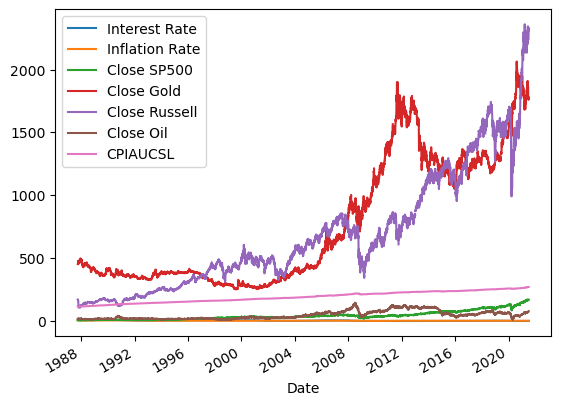

In [352]:
df_cleaned.plot.line(y=['Interest Rate', 'Inflation Rate', 'Close SP500', 'Close Gold', 'Close Russell', 'Close Oil', 'CPIAUCSL'] , x='Date')

In [353]:
df_cleaned

,Date,Interest Rate,Inflation Rate,Close SP500,Close Gold,Close Russell,Close Oil,CPIAUCSL
6699,1987-10-01,7.29,4.3,9.135417,453.46,171.399994,18.50,115.000
6700,1987-10-02,7.29,4.3,9.175296,454.87,172.080002,18.65,115.000
6701,1987-10-05,7.29,4.3,9.175669,456.83,172.539993,18.78,115.000
6702,1987-10-06,7.29,4.3,8.993629,457.02,170.210007,18.60,115.000
6703,1987-10-07,7.29,4.3,8.971139,457.63,168.869995,18.58,115.000
...,...,...,...,...,...,...,...,...
15606,2021-06-24,0.10,2.2,168.788810,1775.18,2333.620117,75.95,270.664
15607,2021-06-25,0.10,2.2,169.793516,1780.34,2334.399902,76.45,270.664
15608,2021-06-28,0.10,2.2,169.866558,1778.18,2322.340088,74.78,270.664
15609,2021-06-29,0.10,2.2,170.076043,1761.09,2308.840088,75.38,270.664


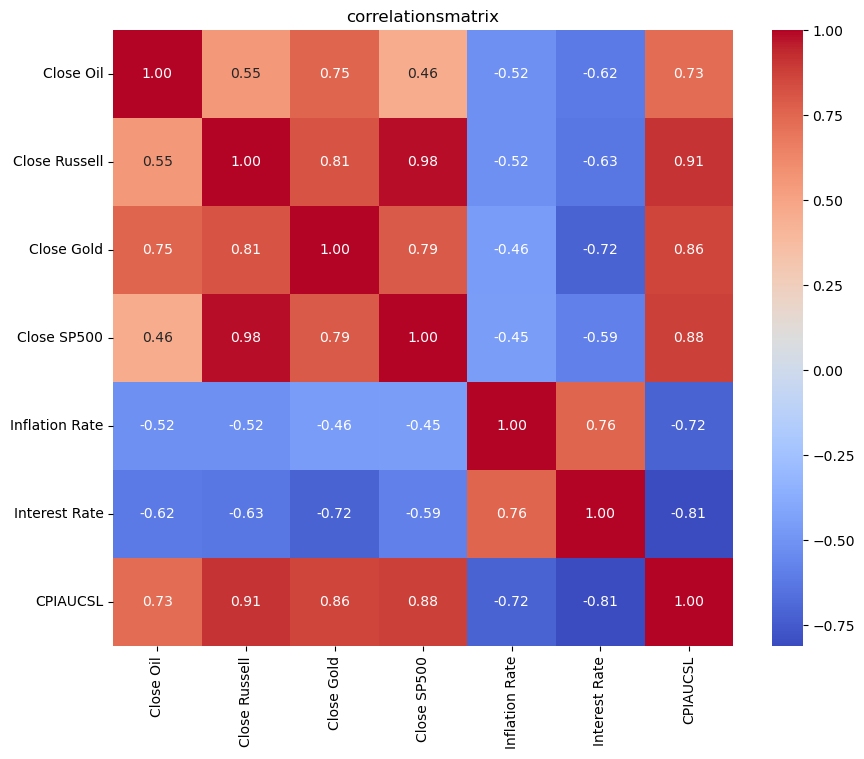

In [354]:
corrmat_df_cleaned = df_cleaned[['Close Oil', 'Close Russell', 'Close Gold', 'Close SP500', 'Inflation Rate', 'Interest Rate', 'CPIAUCSL']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat_df_cleaned, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

## This was just a test to see how much data we have if all null values where removed

### Det har vist sig at alle rækker med manglende værdi'er blev fjernet....

## -----------------------

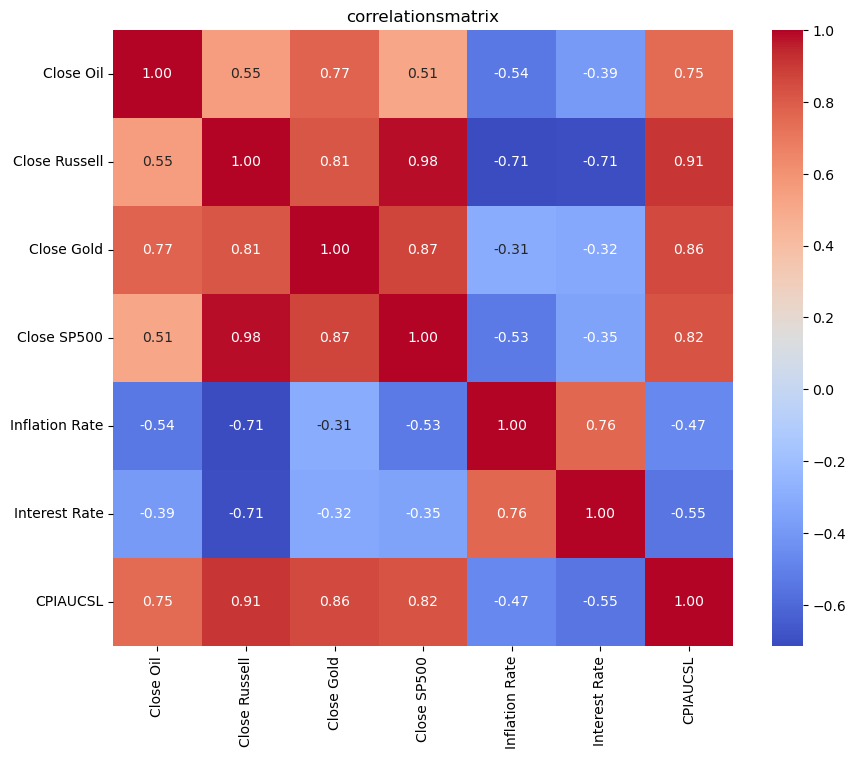

In [355]:
corrmat = df_merged[['Close Oil', 'Close Russell', 'Close Gold', 'Close SP500', 'Inflation Rate', 'Interest Rate', 'CPIAUCSL']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

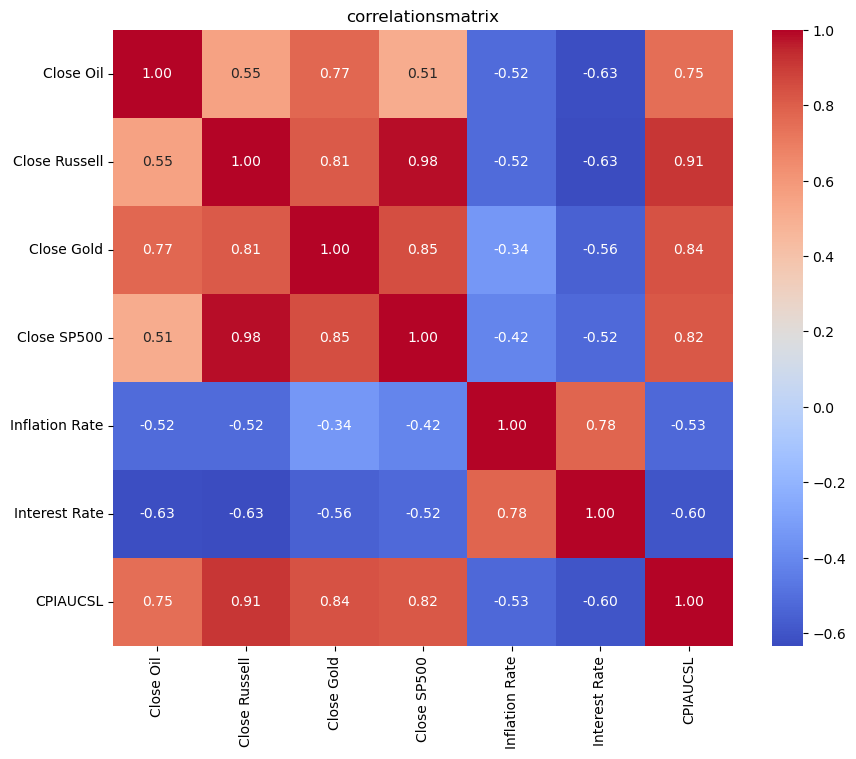

In [356]:
corrmat = df_merged_filtered[['Close Oil', 'Close Russell', 'Close Gold', 'Close SP500', 'Inflation Rate', 'Interest Rate', 'CPIAUCSL']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

## We have a lot of missing values which we want to fill out with interpolate() method or ML

Close SP500        570<br>
Close Gold        4513<br>
Close Russell     7403<br>
Close Oil         6913<br>

In [357]:
# Interpolation

df_merged_interpolated = df_merged_filtered.copy()

df_merged_interpolated['Close Gold'] = df_merged_interpolated['Close Gold'].interpolate()

In [365]:
df_merged_interpolated['Close Oil'] = df_merged_interpolated['Close Oil'].interpolate(method='polynomial', order=2)

In [366]:
df_merged_interpolated['Close Russell'] = df_merged_interpolated['Close Russell'].interpolate(method='polynomial', order=2)

In [367]:
df_merged_interpolated.isna().sum()

Date                 0
Interest Rate        0
Inflation Rate       0
Close SP500        570
Close Gold        4330
Close Russell     6996
Close Oil         6255
CPIAUCSL             0
dtype: int64

### Interpolate didnt work. only a few rows were filled

## now trying with ML

In [368]:
df_merged_ml = df_merged_filtered.copy()

In [369]:
df_merged_ml.dropna(inplace=True)

In [371]:
df_merged_ml.shape

(8441, 8)

In [381]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np


# Definer uafhængige og afhængige variabler
X = df_merged_ml.drop(columns=['Close SP500', 'Date'])
y = df_merged_ml['Close SP500']

# Definer modellen
model = LinearDiscriminantAnalysis()

# Definer model evalueringsmetoden
cv = KFold(n_splits=3, shuffle=True, random_state=1)

# Evaluer modellen
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Rapportér gennemsnitlig præstation
print(f'Accuracy: {result.mean():.3f}')

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py", line 584, in fit
    self.classes_ = unique_labels(y)
                    ^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/multiclass.py", line 106, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([  8.8985245 ,   9.03202596,   9.06064213, ..., 170.07604332,
       170.0141194 , 171.2494587 ]),)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py", line 584, in fit
    self.classes_ = unique_labels(y)
                    ^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/multiclass.py", line 106, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([  8.8985245 ,   9.06064213,   8.91268078, ..., 166.80477057,
       167.80499014, 169.79351571]),)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py", line 584, in fit
    self.classes_ = unique_labels(y)
                    ^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/multiclass.py", line 106, in unique_labels
    raise ValueError("Unknown label type: %s" % repr(ys))
ValueError: Unknown label type: (array([  9.03202596,   8.96477965,   8.91268078, ..., 170.07604332,
       170.0141194 , 171.2494587 ]),)


In [383]:
# Udfylder manglende værdier med forward fill og derefter backward fill
df_filled = df_merged_filtered.fillna(method='ffill').fillna(method='bfill')

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_94284/2263288556.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_merged_filtered.fillna(method='ffill').fillna(method='bfill')


In [385]:
df_filled.shape

(15924, 8)

<Axes: xlabel='Date'>

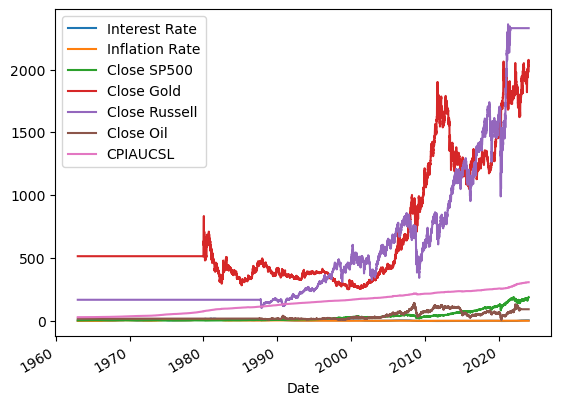

In [386]:
df_filled.plot.line(y=['Interest Rate', 'Inflation Rate', 'Close SP500', 'Close Gold', 'Close Russell', 'Close Oil', 'CPIAUCSL'] , x='Date')

In [387]:
df_filled.describe()

,Date,Interest Rate,Inflation Rate,Close SP500,Close Gold,Close Russell,Close Oil,CPIAUCSL
count,15924,15924.000000,15924.000000,15924.000000,15924.000000,15924.000000,15924.000000,15924.000000
mean,1993-09-26 13:50:35.719668352,4.882573,3.719581,33.276623,698.508389,545.519273,37.623870,144.256961
min,1963-01-01 00:00:00,0.040000,0.600000,2.997108,252.550000,106.080002,9.100000,30.440000
25%,1978-08-17 18:00:00,1.750000,2.200000,5.558160,383.550000,168.970001,18.630000,65.900000
50%,1993-11-09 12:00:00,4.830000,2.700000,12.138757,515.500000,244.309998,18.630000,146.000000
75%,2008-12-02 06:00:00,6.700000,4.600000,41.077285,913.500000,712.732499,54.045000,214.726000
max,2023-12-29 00:00:00,19.100000,13.600000,192.112327,2077.160000,2360.169922,143.950000,308.742000
std,NaN,3.732653,2.511285,42.434344,468.055795,569.076277,30.165535,78.938077


## Normalization
Currently working with this data frame below: df_merged_filtered_dropped

In [143]:
# Laver en kopi af DataFrame uden dato kolonnen (som ikke skal normaliseres)
df_no_date = df_merged_filtered_dropped.drop(columns=['Date'])

# Initialiserer MinMaxScaler
scaler = MinMaxScaler()

# Anvender skaleringen på dataene
df_scaled = scaler.fit_transform(df_no_date)

# Konverterer tilbage til en DataFrame med de samme kolonnenavne
df_scaled = pd.DataFrame(df_scaled, columns=df_no_date.columns)

# Tilføj dato kolonnen tilbage
#df_scaled['Date'] = df_merged_filtered_dropped['Date']

df_scaled.head()

,Interest Rate,Inflation Rate,Close SP500,Close Gold,Close Russell,Close Oil
0,0.151102,0.030769,0.000217,NaN,NaN,NaN
1,0.151102,0.030769,0.000230,NaN,NaN,NaN
2,0.151102,0.030769,0.000231,NaN,NaN,NaN
3,0.151102,0.030769,0.000233,NaN,NaN,NaN
4,0.151102,0.030769,0.000245,NaN,NaN,NaN


## Feature engineering
We want to add rows with the changes of data, to campare changes a specified number of days in the past future with change in market macro economic factors.

In [152]:
# Make copy of current cleaned and filtered data frame
df_diff = df_scaled.copy()
# Calculate interest rate changes an save in new column
df_diff['InterestRateChange'] = df_diff['Interest Rate'].diff()
# Flag days where there is a change in interest rate with 1
df_diff['InterestRateChangeFlag'] = np.where(df_diff['InterestRateChange'] != 0, 1, 0)

# Calculate the difference between the open and close value on the same day
#df_diff['OPEN_CLOSE_CHANGE'] = (df_diff['Close'] - df_diff['Open']) / df_diff['Open']

# Calculate the change of the "Close" value X days from the interest rate change
# and place it the same number of days back on the potential interest change day
df_diff[f'1_DAYS_PLUS'] = df_diff['Close Russell'].diff(periods=1).shift(-1)
df_diff[f'2_DAYS_PLUS'] = df_diff['Close Russell'].diff(periods=2).shift(-2)
df_diff[f'3_DAYS_PLUS'] = df_diff['Close Russell'].diff(periods=3).shift(-3)
df_diff[f'4_DAYS_PLUS'] = df_diff['Close Russell'].diff(periods=4).shift(-4)
df_diff[f'5_DAYS_PLUS'] = df_diff['Close Russell'].diff(periods=5).shift(-5)
df_diff[f'10_DAYS_PLUS'] = df_diff['Close Russell'].diff(periods=10).shift(-10)
df_diff[f'20_DAYS_PLUS'] = df_diff['Close Russell'].diff(periods=20).shift(-20)

df_diff[f'1_DAYS_MINUS'] = df_diff['Close SP500'].diff(periods=-1).shift(1)
df_diff[f'2_DAYS_MINUS'] = df_diff['Close SP500'].diff(periods=-2).shift(2)
df_diff[f'3_DAYS_MINUS'] = df_diff['Close SP500'].diff(periods=-3).shift(3)
df_diff[f'4_DAYS_MINUS'] = df_diff['Close SP500'].diff(periods=-4).shift(4)
df_diff[f'5_DAYS_MINUS'] = df_diff['Close SP500'].diff(periods=-5).shift(5)
df_diff[f'10_DAYS_MINUS'] = df_diff['Close SP500'].diff(periods=-10).shift(10)
df_diff[f'20_DAYS_MINUS'] = df_diff['Close SP500'].diff(periods=-20).shift(20)

In [156]:
df_diff_dropped = df_diff.dropna(subset='Close Russell')
df_diff_dropped.isna().sum()

Interest Rate              0
Inflation Rate             0
Close SP500                0
Close Gold                 0
Close Russell              0
Close Oil                 80
InterestRateChange         0
InterestRateChangeFlag     0
1_DAYS_PLUS                1
2_DAYS_PLUS                2
3_DAYS_PLUS                3
4_DAYS_PLUS                4
5_DAYS_PLUS                5
10_DAYS_PLUS              10
20_DAYS_PLUS              20
1_DAYS_MINUS               0
2_DAYS_MINUS               0
3_DAYS_MINUS               0
4_DAYS_MINUS               0
5_DAYS_MINUS               0
10_DAYS_MINUS              0
20_DAYS_MINUS              0
dtype: int64

In [158]:
df_diff_dropped = df_diff_dropped[df_diff_dropped['InterestRateChangeFlag'] == 1]

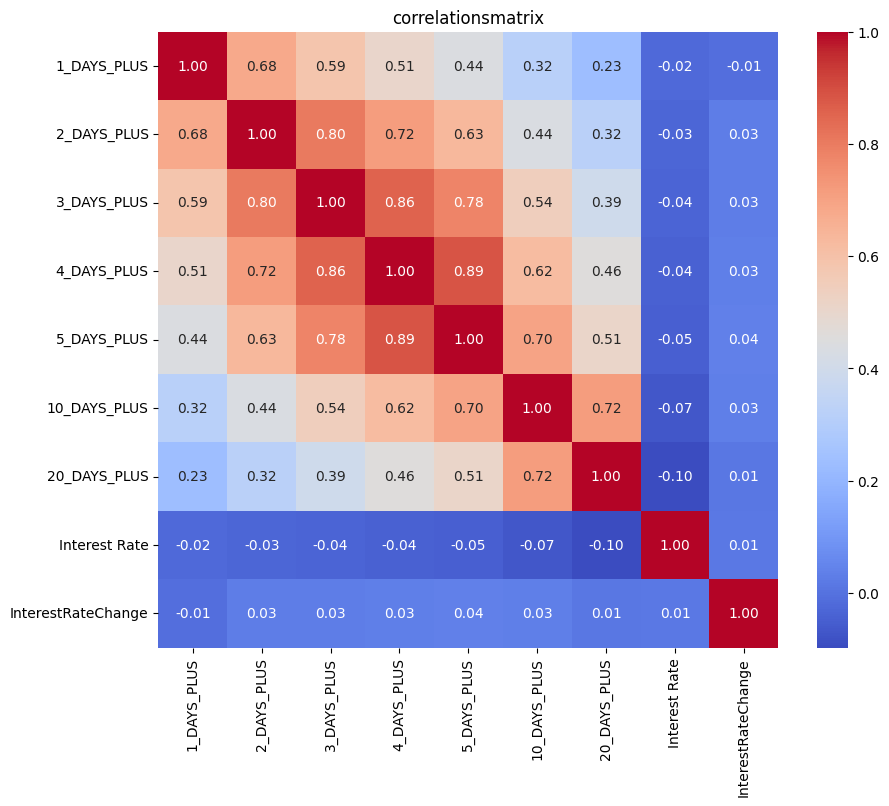

In [159]:
corrmat = df_diff[['1_DAYS_PLUS', '2_DAYS_PLUS', '3_DAYS_PLUS', '4_DAYS_PLUS', '5_DAYS_PLUS', '10_DAYS_PLUS', '20_DAYS_PLUS', 'Interest Rate', 'InterestRateChange']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

<Axes: >

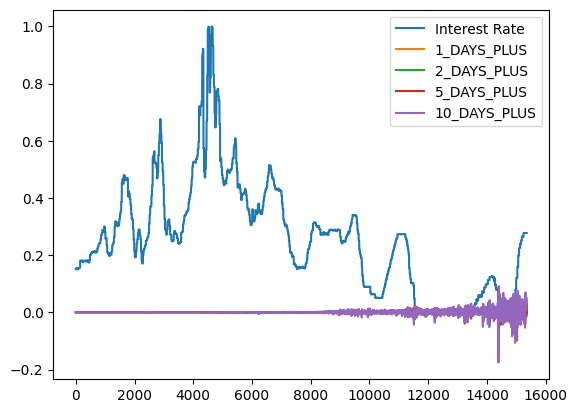

In [150]:
#df_scaled.plot.line(y=['Interest Rate', 'Inflation Rate', 'Close SP500', 'Close Gold', 'Close Russell', 'Close Oil'] , x='Date')
df_diff.plot.line(y=['Interest Rate', 'Close Russell'] , x='Date')